**Welcome to Data Visualization Tutorial.**

**What is Data Visualization?**

  You've been through this. In math class in middle school your teacher told you to plot the points on a graph. It must have looked something like this.
  
  ![alt text](https://www.excel-easy.com/examples/images/line-chart/line-chart.png)
  
  Data visualization refers to the graphical representation of information and data. 
 
** Why is it important?**
 
  Data Visualization is one of the fundamental skills that a data scientist will need. It provides simple and natural ways to visualize large quantities of data. It can be used to help understand our data at a more fundamental level and see trends that we might not have considered before. 
  
**  What will we do?**

  Go over basics of Pandas Dataframe and the Matplotlib Library
  
  We will practice these skills and implement Matplotlib on the data collected about the NFL players in the league. We will learn about different types of graphs and their particular use cases. Once we plot our graphs we will observe how each player's position relate to their total BMI (Body Mass Index)
  
**Resources**
Tutorials on seaborn and data visualization:

[https://www.kaggle.com/learn/data-visualisation](https://www.kaggle.com/learn/data-visualisation)

[https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)



In [0]:
!pip install ohmysportsfeedspy
!pip install simplejson
!pip install pathlib
!pip uninstall seaborn -y
!pip install seaborn




In [0]:
#Plotting Library Seaborn
import seaborn as sns

#Data Managing 
import pandas as pd

#Matrix arithmetics
import numpy as np 

#Plotting Library Matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
!python --version


# **Code from (API Data Collection Project):**


In [0]:
# libraries
from ohmysportsfeedspy import MySportsFeeds
from pprint import pprint
from pathlib import Path
import json

# functions
def get_output_from_api(username, password):
	# where api json file is stored
	path = 'results/roster_players-nfl-2017-2018-regular.json'

	# load json from results cache
	if Path(path).exists():
		with open(path, 'r') as f:
			output = json.load(f)
	# make request to API if no cache
	else:
		msf = MySportsFeeds(version="1.2", verbose=True)
		msf.authenticate(username, password)
		output = msf.msf_get_data(league='nfl', season='2017-2018-regular', feed='roster_players', format='json')

	return output

def get_player(entry):
	# store each player as an object
	player = {}

	# add respective fields for players
	try:
		player['name'] = entry['player']['FirstName'] + ' ' + entry['player']['LastName']
		player['position'] = entry['player']['Position']
		player['height'] = entry['player']['Height']
		player['weight'] = entry['player']['Weight']

	# in the case that information is missing, set field to 'N/A'
	except KeyError as error:
		attribute = str(error).strip('\'').lower()
		player[attribute] = 'N/A'

	return player

def get_team_players(output):
	# stores teams as keys and a list of player as values
	teams = {}

	# add every player from output
	for entry in output['rosterplayers']['playerentry']:
		# get player information in an object
		player = get_player(entry)

		# initializes list once from each team
		if entry['team']['Name'] not in teams:
			teams[entry['team']['Name']] = []

		# adds player to the appropriate team list
		teams[entry['team']['Name']].append(player)

	return teams

def save_to_file(teams):
	# opens file with write permissions
	f = open('results.txt', 'w')

	# converts dictionary to string and saves in file
	f.write(str(teams))

	# closes file stream
	f.close()

# commands
username = '8663abc5-a99a-4f33-90c4-c1d697'
password = 'Dk30RQHT'

output = get_output_from_api(username, password)

teams = get_team_players(output)

pprint(teams['Titans'][0])

In [14]:
print("There are {} teams".format(len(teams)))

There are 32 teams


*   We have our data from the API stored in a dictionary
*   We need to calculate the BMI for each player
*   Each player has weight in pounds(lbs) and height in feet(ft).

The equation for body mass index:



![alt text](https://i.imgur.com/RqqBZsRl.png)

# **Ex 1:** complete the BMI_calc function:

Use the equation above as a guide

Use mass and height to calculate the BMI

*   mass will be in pounds
*   height will be in inches



In [0]:
#remember height is squared

def BMI_calc(height, mass):
  # write code here
  
  
  
  
  return (BMI)



#Test it
For a person that is 70 inches tall and 150 pounds their BMI should be 21.5

Run the cell below and see if your function outputs roughly 21.5


In [0]:
test_height = 70
test_weight = 150

print("My equation says: {}".format(BMI_calc(test_height, test_weight)))

In [0]:
#@title Solution Ex.1
def BMI_calc(inches, weight):
      # the equation asks us to square height
      inches_squared = inches**2
      BMI = weight / (inches_squared) * 703
      return (BMI)

**Was your output correct?**

if you are having trouble refer to solution



---



Find out your own BMI by changing the test_height and test_weight to your own.

If you have finished Ex. 1. 
Run the cell below.

In [0]:
def convertft_to_in(height):
    # height is a string so that looks like this "5'11"
    # we need to take out the quote for inches and separate both numbers
    # command below will do that:
    # height.replace("\"", '').split('\''))
    
    ft = int(height.replace("\"", '').split('\'')[0])
    inches = int(height.replace("\"", '').split('\'')[1])
    inches += (ft * 12)
    return inches

position = []
BodyMassIndex = []
Name = []
Height = []
Weight = []
Team = []
i = 0
# Iterate through list of Teams
for tm in teams:
  # Iterate through each teams players
  for player in range(0, len(teams[tm])):
    # "player" will be a dictionary with name, position, height, and weight
    
    # check if weight exists
    # there was nine datapoints where a player's weight was not added.
    # I will exclude them from the dataset.
    # This a perfect example of the real world.
    # Usually data we recieve is not perfect and will have missing values or outliers
    if 'weight' in teams[tm][player]:
      height = teams[tm][player]['height']
      weight = int(teams[tm][player]['weight'])
      inches = convertft_to_in(height)
    
      BMI = BMI_calc(inches, weight)
      
      #Lets create lists for easier conversion to Pandas
      Team.append(tm)
      Height.append(inches)
      Weight.append(weight)
      Name.append(teams[tm][player]['name'])
      BodyMassIndex.append(BMI)
      position.append(teams[tm][player]['position'])

      teams[tm][player]['BMI'] = BMI
      if (i == 0):
        print("Player Name: {}".format(teams[tm][player]['name']))
        print("Weight: {}".format(weight))
        print("Height: {}".format(inches))
        print("BMI: {}".format(BMI))
        print("")
    i += 1
                                                          

print("number of datapoints: {}".format(len(position)))

#create a pandas.DataFrame
data = pd.DataFrame(
    {'Team': Team,
     'Name': Name,
     'Position': position,
     'Height': Height,
     'Weight': Weight,
     'BMI': BodyMassIndex
    })

#sort the dataframe to this order
data = data[['Team', 'Name', 'Position', 'Weight', 'Height', 'BMI',]]

The cell above:

*   created a panda dataframe named data.




#Try a few dataframe commands

learn more: 
[https://www.youtube.com/watch?v=XDAnFZqJDvI&t=80s](https://www.youtube.com/watch?v=XDAnFZqJDvI&t=80s)

In [0]:
#what our dataframe looks like
data

In [0]:
#the first few rows of our dataframe

data.head(5)

In [0]:
#the last few rows of our dataframe

data.tail(5)

In [0]:
#only show the column team

data['Team'][0:5]

In [0]:
#you can end with a column name and do the same

data.Team[0:5]

In [0]:
#to group dataframe in particular ways
# Tutorial on groupby -> https://www.youtube.com/watch?v=qy0fDqoMJx8

data.groupby('Team').mean()

# **Matplotlib Basics**

**To plot a simple line graph use plt.plot()**

plt.plot(x,y) will plot a line with points going through the two lists

In [0]:
x = [0,1,2,3]
y = [4,3,2,1]

plt.plot(x,y)
plt.ylabel("Y axis") 
plt.xlabel("X axis")
plt.title("First Line Graph")

**To plot a scatter plot use plt.scatter()**

In [0]:
plt.scatter([1,2,3,4],[2,3,4,5])
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.title("First Scatter plot")

**An example of using a scatter plot for our data.**

Position for x axis and Height for y axis

In [0]:
fig = plt.figure(figsize=(8.5, 7))
plt.scatter(data.Position, data.Height)
plt.ylabel("Height")
plt.xlabel("Position")
plt.title("Position x Height scatter plot")

#**Ex. 2**

** Plot Position x BMI on a scatter plot**


*   Now that we know how to plot Position by Height in a scatter plot
*   Lets try plotting Position by BMI instead.
*   The graph should look similar to the graph above



In [0]:
#Write Code Below



In [0]:
#@title Solution Ex.2
#plot a scatter plot of each player's position and BMI

fig = plt.figure(figsize=(8.5, 7))
plt.scatter(data.Position, data.BMI)
plt.ylabel("BMI")
plt.xlabel("Position")
plt.title("Position x BMI scatter plot")

#Observe each position and answer these questions

*  How high is the BMI?
*  Does the BMI span a large range?
*  What position is this? (refer to list below)
*  Does the position's role explain the BMI?


---


**TRENDS**
*   Players who need quickness will have lower BMI's
*   Players who need strength will have higher BMI's

---



#Roles
**DB (Defensive Back)**

     Defensive backs are the smaller, quicker, and faster defensive players who frequently serve as a defense’s backstop – the last, best hope at stopping an offensive player who’s gotten loose 

**LB (Line Backer)**
      
     Linebackers play behind the defensive line and perform various duties depending on the situation, including rushing the passer, covering receivers, and defending against the run.
        
**LS (Long Snapper)**

     A specialized center who snaps the ball directly to the holder or punter. This player is usually distinct from the regular center, as the ball often has to be snapped much farther back on kicking plays.
    
    
**DE (Defensive end)**

     Their function is to attack the passer or stop offensive runs to the outer edges of the line of scrimmage (most often referred to as "containment"). The faster of the two is usually placed on the right side of the defensive line (quarterback's left) because that is a right-handed quarterback's blind side.
    
    
**DT (Defensive tackle)**

      Sometimes called a defensive guard, defensive tackles play at the center of the defensive line. Their function is to rush the passer (if they can get past the offensive linemen blocking them), and stop running plays directed at the middle of the line of scrimmage. 

**QB (Quarterback)**

      The quarterback is the player who receives the ball from the center to start the play. The most important position on the offensive side, the quarterback is responsible for receiving the play from the coaches on the sideline and communicating the play to the other offensive players in the huddle.
    
**OT (Offensive tackle)**

      Two tackles play outside of the guards. Their role is primarily to block on both running and passing plays. The area from one tackle to the other is an area of "close line play" in which blocks from behind, which are prohibited elsewhere on the field, are allowed. For a right-handed quarterback, the left tackle is charged with protecting the quarterback from being hit from behind (known as his "blind side")
      
      
**SS (Strong Safety)**

      The safeties are the last line of defense (farthest from the line of scrimmage) and usually help the corners with deep-pass coverage. The strong safety (SS) is usually the larger and stronger of the two, providing extra protection against run plays by standing closer to the line of scrimmage, usually on the strong (tight end) side of the field.
    
**WR (Wide Reciever)**

     The wide receivers are pass-catching specialists. Their main job is to run pass routes and get open for a pass, although they are occasionally called on to block.

**RB (Running backs)**

      Running backs are players who line up behind the offensive line, who are in position to receive the ball from the quarterback, and execute a rushing play. 
    
**FB (Feature Back)**
    
      A running back will sometimes be called a "feature back" if he is the team's starting running back.
    
**CB (CornerBack)**
        
     Typically two players primarily cover the wide receivers. Cornerbacks attempt to prevent successful quarterback passes by either swatting the airborne ball away from the receiver or by catching the pass themselves. 

**C (Center)**
 
      The center is the player who begins the play from scrimmage by snapping the ball to the quarterback. Like all offensive linemen, the center has the responsibility to block defensive players. 
   
**P (Punter)**
      
      The punter, upon receiving the snap, drops the ball and kicks it from the air.

**G (Gunner)**

      A player on kickoffs and punts who specializes in running down the field very quickly in an attempt to tackle the returner.
    
    
**OLB (Outside Linebacker)**

     Linebackers play behind the defensive line and perform various duties depending on the situation, including rushing the passer, covering receivers, and defending against the run.
  

**ILB (Inside Linebacker)**

     Same as Middle Linebacker
    
**TE (Tight End)**

     Tight ends play on either side of, and directly next to, the tackles. Tight ends are considered hybrid players, something between a wide receiver and an offensive lineman. Because they play next to the other offensive linemen, they are frequently called on to block, especially on running plays. However, because they are eligible receivers, they may also catch passes.


**K (Kicker)**
  
    Also called the "placekicker", he handles kickoffs, extra points, and field goal attempts. All three situations require the kicker to kick the ball off of the ground, either from the hands of a "holder" or off of a "tee"

**T (Tackle)**

    Same as Offensive Tackle

**FS (Free Safety)**
     
     The free safety (FS) is usually the smaller and faster of the two safeties, and is usually the deepest player on the defense, providing help on long pass plays.

**MLB (Middle Linebacker)**
  
      Middle linebackers must be capable of stopping running backs who make it past the defensive line, covering pass plays over the middle, and rushing the quarterback on blitz plays.

**NT (Nose Tackle)**

    The most interior defensive tackle who sometimes lines up directly across from the ball (and therefore is almost nose-to-nose with the offense's center) is often called a nose tackle, alternately nose guard or middle guard.
    

More info here: https://en.wikipedia.org/wiki/American_football_positions

 **To plot a simple bar graph use plt.bar()**

Bar graph's are best used to describe categorical data.




In [0]:
Potato = [2,4,10,3]
States = ['California', "Hawaii", "Idaho", "Texas"]
plt.bar(States, Potato, color=['Blue', 'Red','Green', 'Black'])
plt.xlabel("States")
plt.ylabel("Potatoes per day")
plt.title("Potato Output per State")

**An example of a bar graph on our data**

Lets plot average Weight x Position on a bar graph.

Panda method groupby works well here to arange our dataframe in a shape that makes it easy to graph

In [0]:
avg_height_pos = data.groupby('Position').Height.mean()

fig = plt.figure(figsize=(8.5, 6))

plt.bar(avg_height_pos.index, avg_height_pos.values, color=['Blue', 'Green', 'Black'])
plt.ylabel("Average Height")
plt.xlabel("Position")
plt.title("Position x Average Height bar plot")

Text(0.5,1,'Position x Average Height bar plot')

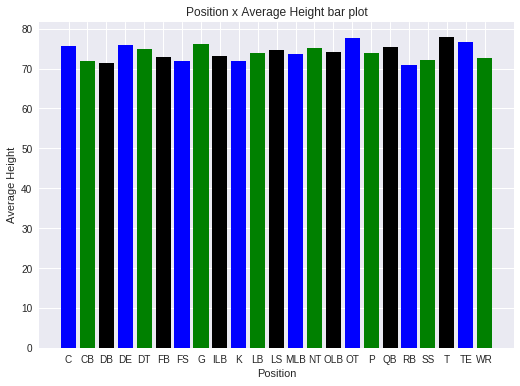

In [0]:
avg_height_pos = data.groupby('Position').Height.mean()

fig = plt.figure(figsize=(8.5, 6))

plt.bar(avg_height_pos.index, avg_height_pos.values, color=['Blue', 'Green', 'Black'])
plt.ylabel("Average Height")
plt.xlabel("Position")
plt.title("Position x Average Height bar plot")


#Ex. 3

**Plot a bar graph that maps average BMI per position**

*   Use code above as reference



In [0]:
#write code here



In [0]:
#@title Solution Ex.3
avg_bmi_pos = data.groupby('Position').BMI.mean()

fig = plt.figure(figsize=(8.5, 6))

plt.bar(avg_bmi_pos.index, avg_bmi_pos.values)
plt.ylabel("Average BMI")
plt.xlabel("Position")
plt.title("Position x Average BMI bar plot")


# Checking the Distribution of Position in the league

In [0]:
counts = data['Position'].value_counts()
names = counts.index

fig = plt.figure(figsize=(8.5, 7))
postionofbars = list(range(len(names)))
plt.bar(postionofbars,counts)
plt.xticks(postionofbars,names)

Make some observations

Observation
*   Looks like Wide Reciever is the most popular positon right behind Linebacker.
*   There are very few players who are in Middle Line Backer position.


# Violin Plots 
*   Check out [ViolinPlots](https://datavizcatalogue.com/methods/violin_plot.html)
*   Violin Plots are great because they show distribution.![alt text](https://)


> ![alt text](https://datavizcatalogue.com/methods/images/anatomy/SVG/violin_plot.svg)





In [0]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Position')


flights_subset = []
index = data["Position"].unique()
for x in np.unique(data[["Position"]].values):
     flights_subset.append(data[data["Position"] == x]["BMI"].values)


fig, axes = plt.subplots(figsize=(8.5,7))
axes.violinplot(flights_subset, showmeans=True, showmedians=True,
        showextrema=True)
axes.set_title('BMI X Position violin plot')
axes.set_ylabel('BMI')

# set style for the axes
set_axis_style(axes, index)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


Observe the distribution of BMI per Position

*   How spread apart is the BMI?
*   Is it widely spread?
*   Is it a small spread?



#Bonus

Grab different data from the API and plot the new data
